#**Homework**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Train data
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
# Test data
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


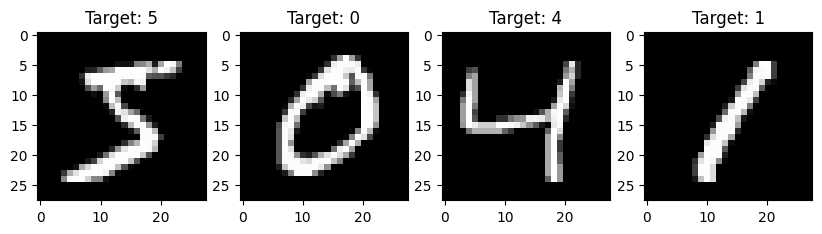

In [ ]:
# Plot numbers
fix, axes = plt.subplots(1, 4, figsize = (10, 3))

for ax, image, label in zip(axes, X_train, y_train):
  ax.imshow(image, cmap="gray")
  ax.set_title(f"Target: {label}")

In [ ]:
# Normalize data
X_train = 2. * (X_train - np.min(X_train)) / np.ptp(X_train) - 1
X_test = 2. * (X_test - np.min(X_test)) / np.ptp(X_test) - 1

In [ ]:
# New range
np.ptp(X_train)

2.0

In [ ]:
# Flattening the image into vector
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
X_train[0][200:210]

array([-1.        , -1.        , -1.        , -0.61568627,  0.86666667,
        0.98431373,  0.98431373,  0.98431373,  0.98431373,  0.98431373])

**Optimizer - stochastic gradient descent**

In [ ]:
model = Sequential()
model.add(Dense(64, activation="sigmoid", input_shape=(784, )))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss = "categorical_crossentropy",
    optimizer = "sgd",
    metrics = ["accuracy"]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Training the model
model.fit(X_train, to_categorical(y_train), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3247 - loss: 2.2131
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7202 - loss: 1.4515
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8221 - loss: 0.8415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8650 - loss: 0.5966
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8815 - loss: 0.4783
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8970 - loss: 0.4081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8993 - loss: 0.3769
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9064 - loss: 0.3447
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9097 - loss: 0.3250
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9133 - loss: 0.3119


In [ ]:
# Counting overall accuracy
model.evaluate(X_test, to_categorical(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9044 - loss: 0.3293


[0.2934072017669678, 0.9161999821662903]

In [ ]:
pred = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


In [ ]:
pred[0]

array([9.5177296e-04, 4.5186840e-04, 7.8910240e-04, 2.0235006e-03,
       1.5443924e-05, 1.7007971e-04, 3.8636217e-06, 9.9066991e-01,
       6.7986257e-05, 4.8564500e-03], dtype=float32)

In [ ]:
print(*np.argmax(pred, axis=1), " Prediction")
print(*y_test[:10], " Target")

7 2 1 0 4 1 4 9 6 9  Prediction
7 2 1 0 4 1 4 9 5 9  Target


**Optimizer - adam**

In [ ]:
# Optimizer adam
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [ ]:
# Training the model
model.fit(X_train, to_categorical(y_train), epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9161 - loss: 0.2869
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9473 - loss: 0.1839
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9575 - loss: 0.1431
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9644 - loss: 0.1188
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9684 - loss: 0.1029
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9711 - loss: 0.0934
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9734 - loss: 0.0861
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9748 - loss: 0.0825
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9767 - loss: 0.0724
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9782 - loss: 0.0692


In [ ]:
# Model accuracy
model.evaluate(X_test, to_categorical(y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1380


[0.11591624468564987, 0.9628999829292297]

In [ ]:
pred = model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [ ]:
print(*np.argmax(pred, axis=1), " Prediction")
print(*y_test[:10], " Target")

7 2 1 0 4 1 4 9 6 9  Prediction
7 2 1 0 4 1 4 9 5 9  Target


#**Creating own numbers**

In [ ]:
!unrar e "numbers.rar"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal

Cannot open numbers.rar
No such file or directory
No files to extract


In [ ]:
import cv2
import matplotlib.pyplot as plt

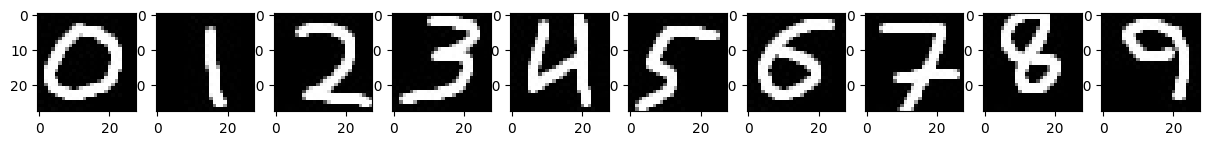

In [ ]:
numbers = [f"{i}.jpg" for i in range(10)]
fig, axes = plt.subplots(1, 10, figsize = (15, 5))
num_lst = []

for ax, i in zip(axes, numbers):
  image = cv2.imread(i, cv2.IMREAD_GRAYSCALE)
  num_lst.append(np.array(image))
  ax.imshow(image, cmap="gray")

In [ ]:
num_lst = np.array(num_lst)
num_lst.shape

(10, 28, 28)

In [ ]:
num_lst = num_lst.reshape((-1, 784))
print(num_lst.shape)

(10, 784)


In [ ]:
num_lst = 2. * (num_lst - np.min(num_lst)) / np.ptp(num_lst) - 1
np.ptp(num_lst)

2.0

In [ ]:
pred = model.predict(num_lst)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [ ]:
print(*np.argmax(pred, axis=1), " Предсказание")
print(*[i for i in range(10)], " Цель")

0 1 2 3 4 5 5 2 6 5  Предсказание
0 1 2 3 4 5 6 7 8 9  Цель
